In [1]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import math
from math import exp
%matplotlib inline

import numpy.random as npr
# normal random distribution
from numpy.random import normal as nprn
# uniform random distribution
from numpy.random import uniform as npru

In [2]:
def Ip2x7(st,rs,A):
    
    A0 = 4.11863563*math.exp(A*0.00479906)*10**-6 # ATP [M]
    
    D1 = []
    D2 = []
    D3 = []
    D4 = []
    C1 = []
    C2 = []
    C3 = []
    C4 = []
    Q1 = []
    Q2 = []
    Q3 = []
    Q4 = []
    time = []
    
    t1 = scipy.linspace(0,st,(st*100))
    y10 = np.array([0,0,0,0,1,0,0,0,0,0,0,0])
    y1 = scipy.integrate.odeint(fp2x7,y10,t1,args=(A0,))
    
    D1 = np.append(D1,y1[:,0])
    D2 = np.append(D2,y1[:,1])
    D3 = np.append(D3,y1[:,2])
    D4 = np.append(D4,y1[:,3])
    C1 = np.append(C1,y1[:,4])
    C2 = np.append(C2,y1[:,5])
    C3 = np.append(C3,y1[:,6])
    C4 = np.append(C4,y1[:,7])
    Q1 = np.append(Q1,y1[:,8])
    Q2 = np.append(Q2,y1[:,9])
    Q3 = np.append(Q3,y1[:,10])
    Q4 = np.append(Q4,y1[:,11])
    time = np.append(time,t1)
    
    A1 = 0
    
    t2 = scipy.linspace(st,(st+rs),(rs*100))
    y20 = np.array([D1[-1],D2[-1],D3[-1],D4[-1],C1[-1],C2[-1],C3[-1],C4[-1],Q1[-1],Q2[-1],Q3[-1],Q4[-1]])
    y2 = scipy.integrate.odeint(fp2x7,y20,t2,args=(A1,))

    D1 = np.append(D1,y2[:,0])
    D2 = np.append(D2,y2[:,1])
    D3 = np.append(D3,y2[:,2])
    D4 = np.append(D4,y2[:,3])
    C1 = np.append(C1,y2[:,4])
    C2 = np.append(C2,y2[:,5])
    C3 = np.append(C3,y2[:,6])
    C4 = np.append(C4,y2[:,7])
    Q1 = np.append(Q1,y2[:,8])
    Q2 = np.append(Q2,y2[:,9])
    Q3 = np.append(Q3,y2[:,10])
    Q4 = np.append(Q4,y2[:,11])
    time = np.append(time,t2)
    
    ## Electrochemistry properties for the estimation of inward current transient
    g12 = 1.5e-8    # [S]
    g34 = 4.5e-8    # [S]
    V = -0.06       # [V] -> the holding potential (used in NCX calculation as well)
    E12 = 0         # [V]
    E34 = 0         # [V]
        
    ## Current generated from the P2X4 gating
    I = g12*(Q1 + Q2)*(V - E12) + g34*(Q3 + Q4)*(V - E34)*10**9 # in [nA] 
    
    return I, time

In [3]:
def fp2x7(y,t,A):
    D1, D2, D3, D4, C1, C2, C3, C4, Q1, Q2, Q3, Q4 = y
    
    # Rate constants 
    k1 = 0.3    # [1/s]
    k2 = 70000  # [1/(M*s)]
    k3 = 5.4    # [1/s]
    k4 = 100000  # [1/(M*s)]
    k5 = 1.58   # [1/s]
    k6 = 7000   # [1/(M*s)]
    
    L1 = 0.0001 # [1/s]
    L2 = 0.004  # [1/s]
    L3 = 0.5    # [1/s]
    
    h1 = 0.001  # [1/s]
    h2 = 0.01   # [1/s]
    H2 = 0.01   # [1/s]
    H2b = 0.5   # [1/s]
    H3 = 0      # [1/s]
    H3b = 0     # [1/s] 
    
    #A = 4.0888*math.exp(BzATP*0.0048)
    
    # ODEs
    dD1dt = k1*D2 - (3*k2*A + h1)*D1
    dD2dt = 3*k2*A*D1 + 2*k3*D3 + h2*C2 - (k1 + 2*k4*A + H3b)*D2 
    dD3dt = 2*k4*A*D2 + 3*k5*D4 + H2b*Q1 - (2*k3 + k6*A)*D3
    dD4dt = k6*A*D3 + h2*Q2 - 3*k5*D4
    
    dC1dt = h1*D1 + k1*C2 + L1*C4 - 3*k2*A*C1
    dC2dt = H3b*D2 + 3*k2*A*C1 + 2*k3*Q1 - (k1 + 2*k4*A + h2)*C2
    dC3dt = 3*k2*A*C4 + 2*k1*Q4 - (k1 + 2*k2*A)*C3
    dC4dt = k1*C3 - (L1 + 3*k2*A)*C4
    
    dQ1dt = 2*k4*A*C2 + 3*k5*Q2 - (2*k3 + k6*A + H2b)*Q1
    dQ2dt = k6*A*Q1 + L2*Q3 - (3*k5 + L3 + h2)*Q2
    dQ3dt = k2*A*Q4 + L3*Q2 - (3*k1 + L2)*Q3
    dQ4dt = 2*k2*A*C3 + 3*k1*Q3 - (2*k1 + k2*A)*Q4
    
    dydt = [dD1dt, dD2dt, dD3dt, dD4dt, dC1dt, dC2dt, dC3dt, dC4dt, dQ1dt, dQ2dt, dQ3dt, dQ4dt]
    
    return dydt

In [10]:
I1, time1 = Ip2x7(120,10,100) # st,rs,A
I2, time2 = Ip2x7(120,10,320) # st,rs,A
I3, time3 = Ip2x7(120,10,1000) # st,rs,A

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


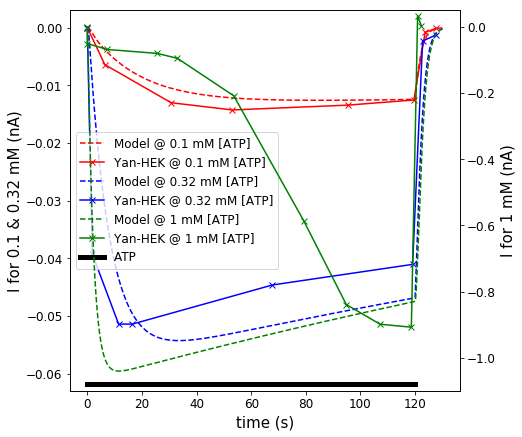

In [11]:
# Khadra P2X7 HEK ATP st 15s 1000 uM
t10 = np.array([0,0.05952380952,0.2976190476,1.071428571,7.023809524,15.5952381,16.13095238,16.9047619,18.21428571])
# Yan P2X7 HEK ATP st 120s 320 uM
t11 = np.array([0,1.832061069,11.45038168,16.48854962,67.78625954,119.0839695,122.7480916,127.7862595])
# Yan P2X7 HEK ATP st 120s 100 uM
t12 = np.array([0,6.41221374,30.6870229,53.12977099,95.26717557,119.5419847,123.6641221,127.7862595])
# Yan P2X7 HEK ATP st 40s 10000 uM
t13 = np.array([0,0.2777777778,3.611111111,17.77777778,40,40.83333333,42.22222222,43.33333333])
# Yan P2X7 HEK ATP st 120s 3200 uM
t14 = np.array([0,0.9160305344,2.290076336,14.65648855,20.61068702,67.32824427,118.6259542,122.2900763,124.1221374])
# Yan P2X7 HEK ATP st 120s 1000 uM
t15 = np.array([0,0,7.328244275,25.64885496,32.97709924,53.58778626,79.23664122,94.80916031,107.1755725,118.6259542,120.9160305,122.2900763])

y10 = np.array([0,-0.1089494163,-0.2583657588,-0.2178988327,-0.4560311284,-0.7035019455,-0.1167315175,-0.0233463035,0.003112840467])
y11 = np.array([0,-0.03928571429,-0.05142857143,-0.05142857143,-0.04464285714,-0.04107142857,-0.002321428571,-0.00125])
y12 = np.array([0,-0.006428571429,-0.01303571429,-0.01428571429,-0.01345238095,-0.01255952381,-0.0008333333333,-0.000119047619])
y13 = np.array([0,-3.705357143,-3.869047619,-4.43452381,-4.419642857,-1.800595238,-0.2678571429,-0.08928571429])
y14 = np.array([0,-1.28125,-1.291666667,-2.833333333,-3.15625,-3.302083333,-3.322916667,-0.125,-0.03125])
y15 = np.array([0,-0.0505952381,-0.06845238095,-0.08035714286,-0.09523809524,-0.2083333333,-0.5863095238,-0.8392857143,-0.8988095238,-0.9077380952,0.03273809524,0.002976190476])

timeATP = np.array([0,120])
ATP = np.array([-1.08,-1.08])

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot(time1,I1,'r--',label="Model @ 0.1 mM [ATP]")
lns2 = ax.plot(time2,I2,'b--',label="Model @ 0.32 mM [ATP]")
lns3 = ax2.plot(time3,I3,'g--',label="Model @ 1 mM [ATP]")
lns4 = ax.plot(t12,y12,'r-x',label="Yan-HEK @ 0.1 mM [ATP]")
lns5 = ax.plot(t11,y11,'b-x',label="Yan-HEK @ 0.32 mM [ATP]")
lns6 = ax2.plot(t15,y15,'g-x',label="Yan-HEK @ 1 mM [ATP]")
lns7 = ax2.plot(timeATP,ATP,'black',lw=5,label="ATP")
ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("I for 0.1 & 0.32 mM (nA)",fontsize=15)
ax2.set_ylabel("I for 1 mM (nA)",fontsize=15)
ax.set_ylim(-0.063,0.003)
ax2.set_ylim(-1.1,0.05)
lns = lns1 + lns4 + lns2 + lns5 + lns3 + lns6 + lns7
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=6,fontsize=12) 
#plt.ylim((-2.5,0.2))
#ax = plt.subplot(1,1,1)
#ax2 = ax.twinx()
#lns1 = ax.plot(time,I,'k-',label="in nA sim")
#lns2 = ax2.plot(time,I*1000,'k--',label="in pA sim")
#lns3 = ax2.plot(t12,y12,'r--',label='0.1mM ATP 120s')
#lns4 = ax2.plot(t11,y11,'b--',label="0.32mM ATP 120s")
#lns5 = ax.plot(t15,y15,'r-',label="1mM ATP 120s")
#lns6 = ax.plot(t14,y14,'b-',label="3.2mM ATP 120s")
#lns7 = ax.plot(t13,y13,'g-',label="10mM ATP 40s")
    
#ax.set_xlabel("time (s)",fontsize=15)
#ax.set_ylabel("nA",fontsize=15)
#ax2.set_ylabel("pA",fontsize=15)
#ax2.set_ylim(-55,1)
    
#lns = lns1 + lns2 + lns3+ lns4 + lns5 + lns6 + lns7
#labs = [l.get_label() for l in lns]
#ax.legend(lns,labs,loc=0, fontsize=15)
plt.savefig("p2x7vali.png")

In [21]:
Ip2x7(120,10,3200) # st,rs,A

(array([-0.        , -0.01345532, -0.02685233, ..., -0.01875327,
        -0.01864285, -0.01853307]),
 array([  0.00000000e+00,   1.00008334e-02,   2.00016668e-02, ...,
          1.29979980e+02,   1.29989990e+02,   1.30000000e+02]))

In [89]:
math.exp(1)

2.718281828459045